# Master Notebook for Plotting

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import figure, show, legend, ylabel
import pandas as pd
import numpy as np

# Data Files
consumer = "Govt_Data/consumer_sentiment.csv"
interest = "Govt_Data/Interest_rates.csv"
UE = "Govt_Data/Unemployment.csv"

auto_stocks = "Stock_Data/Auto_stock_data.csv"
SP = "Stock_Data/Stock_Data.csv"
car_sales = "Car_sales_Data/Car_data.csv"
autogroup_marketshare = "Car_sales_Data/Autogroup_marketshare_est.csv"

allState_path = "COVID_data/all-states-history.csv"
usCovid_path = "COVID_data/national-history.csv"
conSent_path = "COVID_data/UMICH-SOC38.csv"
                                 

# Car Sales Data

In [2]:
# Read Purchasing File and store into Pandas data frame
car_data_df = pd.read_csv(car_sales)

#Remove column Q4 2019 & Q4 2020 as Quarter 4 data was not fully published at the time of the project.
drop_col=['Q4 2019', 'Q4 2020','Autogroup']
car_data_df = car_data_df.drop(drop_col, axis=1)

#car_data_df

In [3]:
# Create new columns for Segment - this is prep for creating a sales trendline by Segment.

# Create a list of our segments
segments = [
    (car_data_df['Avg Price'] <= 30000),
    (car_data_df['Avg Price'] > 30000) & (car_data_df['Avg Price'] <= 45000),
    (car_data_df['Avg Price'] > 45000) & (car_data_df['Avg Price'] <= 70000),
    (car_data_df['Avg Price'] > 70000)
    ]

# Create a list of the values we want to assign for each segment.
values = ['Economy', 'Mid-Range', 'Luxury', 'Ultra Luxury']

# Create a new column and use np.select to assign values to it using our lists as arguments
car_data_df["Segment"] = np.select(segments, values)
car_data_df

,Brand,Avg Price,Q1 2019,Q2 2019,Q3 2019,Q1 2020,Q2 2020,Q3 2020,Segment
0,Acura,40000,36385,37382,39046,28531,27458,39664,Mid-Range
1,Alfa Romeo,50000,4286,4751,4310,3702,3735,5056,Luxury
2,Audi,59017,48115,53325,57031,41371,34839,47896,Luxury
3,Bentley,211000,2385,2385,2385,2499,2499,2499,Ultra Luxury
4,BMW,69000,73888,82551,75987,62152,50956,68439,Luxury
5,Bugatti,2400000,21,21,21,19,19,19,Ultra Luxury
6,Buick,33000,51865,55373,50614,33870,35521,49170,Mid-Range
7,Cadillac,54000,35996,39739,39962,30323,23297,32966,Luxury
8,Chevrolet,33000,451742,486884,505913,429529,330381,449134,Mid-Range
9,Chrysler,32000,31591,32831,29544,29945,13857,31869,Mid-Range


In [4]:
# Group by Market Segment
Economy1 = car_data_df.loc[(car_data_df['Segment'] == "Economy"), :]

MidRange1 = car_data_df.loc[(car_data_df['Segment'] == "Mid-Range"), :]

Luxury1 = car_data_df.loc[(car_data_df['Segment'] == "Luxury"), :]

UltraLuxury1 = car_data_df.loc[(car_data_df['Segment'] == "Ultra Luxury"), :]

In [5]:
# Group by Date to create sales volume trendline by Segment
EconSales = Economy1.groupby(['Segment']).sum()
EconSales = EconSales.reset_index()

MidRngSales = MidRange1.groupby(['Segment']).sum()
MidRngSales = MidRngSales.reset_index()

LuxSales = Luxury1.groupby(['Segment']).sum()
LuxSales = LuxSales.reset_index()

UltraLuxSales = UltraLuxury1.groupby(['Segment']).sum()
UltraLuxSales = UltraLuxSales.reset_index()

In [6]:
# Economy car segment dataframe cleaning and transposition
# Drop Segment and Avg Price column
EconSales = EconSales.drop(['Segment','Avg Price'], axis=1)

# Transpose dataframes for trendlines
EconSales_T = EconSales.T

# Reset indexes
EconSales_T = EconSales_T.reset_index()

# Rename column
EconSales_T = EconSales_T.rename(columns={'index': 'Quarter',0:'Sales'})

In [7]:
# Mid-Range car segment dataframe cleaning and transposition
# Drop Segment and Avg Price column
MidRngSales = MidRngSales.drop(['Segment','Avg Price'], axis=1)

# Transpose dataframes for trendlines
MidRngSales_T = MidRngSales.T

# Reset indexes
MidRngSales_T = MidRngSales_T.reset_index() 

# Rename column
MidRngSales_T = MidRngSales_T.rename(columns={'index': 'Quarter',0:'Sales'})

In [8]:
# Luxury car segment dataframe cleaning and transposition
# Drop Segment and Avg Price column
LuxSales = LuxSales.drop(['Segment','Avg Price'], axis=1)

# Transpose dataframes for trendlines
LuxSales_T = LuxSales.T

# Reset indexes
LuxSales_T = LuxSales_T.reset_index() 

# Rename column
LuxSales_T = LuxSales_T.rename(columns={'index': 'Quarter',0:'Sales'})

In [9]:
# Ultra Luxury car segment dataframe cleaning and transposition
# Drop Segment and Avg Price column
UltraLuxSales = UltraLuxSales.drop(['Segment','Avg Price'], axis=1)

# Transpose dataframes for trendlines
UltraLuxSales_T = UltraLuxSales.T

# Reset indexes
UltraLuxSales_T = UltraLuxSales_T.reset_index() 

# Rename column
UltraLuxSales_T = UltraLuxSales_T.rename(columns={'index': 'Quarter',0:'Sales'})
UltraLuxSales_T

,Quarter,Sales
0,Q1 2019,29722
1,Q2 2019,29931
2,Q3 2019,29503
3,Q1 2020,22792
4,Q2 2020,23001
5,Q3 2020,26356


In [10]:
#Total sales for each brand for 2019 Q1-Q3
car_data_df["2019 Total Sales"] = car_data_df["Q1 2019"] + car_data_df["Q2 2019"] + car_data_df ["Q3 2019"]

#Total sales for each brand for 2020 Q1-Q3
car_data_df["2020 Total Sales"] = car_data_df["Q1 2020"] + car_data_df["Q2 2020"] + car_data_df ["Q3 2020"]

#Find the percentage change of sales between 2019 & 2020 sales
car_data_df["Percent Change"] = ((car_data_df["2020 Total Sales"] - car_data_df["2019 Total Sales"]) / car_data_df["2019 Total Sales"]) * 100

#car_data_df['Percent Change'] = car_data_df['Percent Change'].map("{:,.0f}%".format)

# Round percent values
decimals = 2    
car_data_df['Percent Change'] = car_data_df['Percent Change'].apply(lambda x: round(x, decimals))

#Display results
#car_data_df

In [11]:
# Quarterly data and Avg Price no longer required.
drop_col=['Avg Price', 'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q1 2020', 'Q2 2020','Q3 2020']
car_data_df = car_data_df.drop(drop_col, axis=1)

# Display results
car_data_df

,Brand,Segment,2019 Total Sales,2020 Total Sales,Percent Change
0,Acura,Mid-Range,112813,95653,-15.21
1,Alfa Romeo,Luxury,13347,12493,-6.40
2,Audi,Luxury,158471,124106,-21.69
3,Bentley,Ultra Luxury,7155,7497,4.78
4,BMW,Luxury,232426,181547,-21.89
5,Bugatti,Ultra Luxury,63,57,-9.52
6,Buick,Mid-Range,157852,118561,-24.89
7,Cadillac,Luxury,115697,86586,-25.16
8,Chevrolet,Mid-Range,1444539,1209044,-16.30
9,Chrysler,Mid-Range,93966,75671,-19.47


In [12]:
# Average percentage change
car_data_df["Percent Change"].mean()

# Create dtaaframe for average
Avg = pd.DataFrame({'Brand': ['Brand Average'],'Segment': ['Brand Average'],'Percent Change': [-18.04]},index=[0])

# Change data type from 'object' to 'float'
Avg['Percent Change'] = pd.to_numeric(Avg['Percent Change'], errors='coerce')

Avg

,Brand,Segment,Percent Change
0,Brand Average,Brand Average,-18.04


In [13]:
# Change data type from 'object' to 'float'
car_data_df['Percent Change'] = pd.to_numeric(car_data_df['Percent Change'], errors='coerce')

# Yearly data no longer required.
drop_col=['2019 Total Sales', '2020 Total Sales']
car_data_df = car_data_df.drop(drop_col, axis=1)

# Sort values ascending
car_data_sorted = car_data_df.sort_values(by='Percent Change', ascending=True) 

# Top 5 winners
Top_5 = car_data_sorted.nlargest(5,['Percent Change'])


In [14]:
# Top 5 losers
Bottom_5 = car_data_sorted.nsmallest(5,['Percent Change'])
Bottom_5

,Brand,Segment,Percent Change
28,McLaren,Ultra Luxury,-72.87
12,Fiat,Economy,-52.18
10,Dodge,Economy,-38.50
26,Maserati,Ultra Luxury,-38.33
32,Nissan,Economy,-35.69


In [15]:
# Concatenate frames for bar chart use.

frames = [Top_5, Bottom_5, Avg]

top = pd.concat(frames)

# Sort values ascending
top = top.sort_values(by='Percent Change', ascending=True) 

top

,Brand,Segment,Percent Change
28,McLaren,Ultra Luxury,-72.87
12,Fiat,Economy,-52.18
10,Dodge,Economy,-38.50
26,Maserati,Ultra Luxury,-38.33
32,Nissan,Economy,-35.69
0,Brand Average,Brand Average,-18.04
25,Lincoln,Luxury,-5.53
39,Volvo,Luxury,-4.94
27,Mazda,Economy,-2.35
3,Bentley,Ultra Luxury,4.78


### Plot Car Sales Data

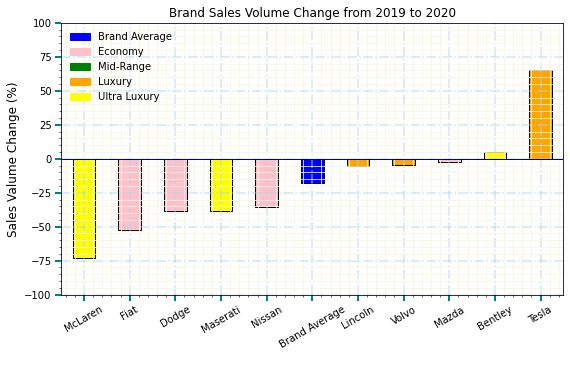

In [16]:
# Bar chart with the biggest gainers and losers for sales volume
# Bar chart selection 
import matplotlib.patches as mpatches

# Define a dictionary mapping variable values to colours:
colors = {"Economy": "pink", "Luxury": "orange", "Ultra Luxury": "yellow","Brand Average": "blue"}

top.plot.bar(x='Brand',y='Percent Change',edgecolor='black', color = top['Segment'].replace(colors), legend = False, align="center", figsize=(9,5), rot=30, title="Brand Sales Volume Change from 2019 to 2020")

blue_patch = mpatches.Patch(color='blue', label='Brand Average')
pink_patch = mpatches.Patch(color='pink', label='Economy')
green_patch = mpatches.Patch(color='green', label='Mid-Range')
orange_patch = mpatches.Patch(color='orange', label='Luxury')
yellow_patch = mpatches.Patch(color='yellow', label='Ultra Luxury')

plt.legend(handles=[blue_patch, pink_patch,green_patch,orange_patch,yellow_patch], frameon=False,fontsize=10)

# Sets the y limits
plt.ylim(-100, 100)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Sales Valume Change (%)", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
#plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.axhline(y=0, lw=1, color='darkblue')

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Brand Sales Change.png')

plt.show(block=True)

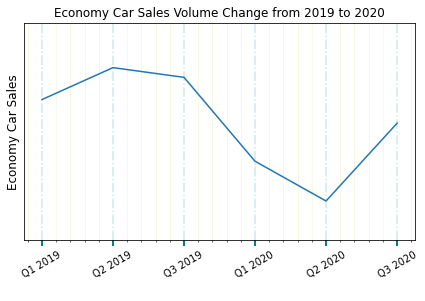

In [17]:
# Economy car sales volume line plot

# Line chart selection
EconSales_T.plot.line(x='Quarter',y='Sales', figsize=(7,4), legend = False, rot=30, title="Economy Car Sales Volume Change from 2019 to 2020");

# Sets the y limits
plt.ylim(900000, 1800000)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Economy Car Sales", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Economy Car Sales Change.png')

plt.show(block=True)

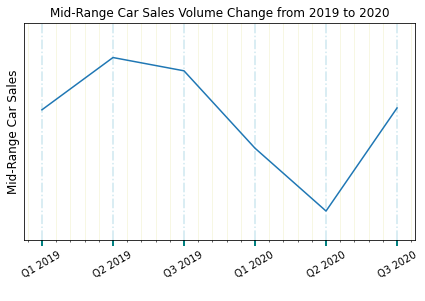

In [18]:
# Mid-Range car sales volume line plot

# Line chart selection
MidRngSales_T.plot.line(x='Quarter',y='Sales', figsize=(7,4), legend = False, rot=30, title="Mid-Range Car Sales Volume Change from 2019 to 2020");

# Sets the y limits
plt.ylim(1400000, 2500000)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Mid-Range Car Sales", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Mid-Range Car Sales Change.png')

plt.show(block=True)

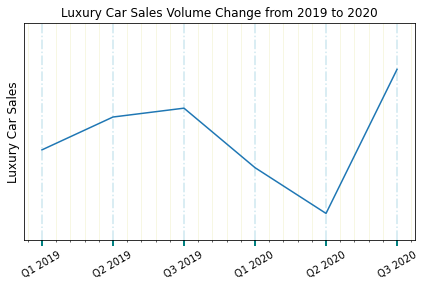

In [19]:
# Luxury car sales volume line plot

# Line chart selection
LuxSales_T.plot.line(x='Quarter',y='Sales', figsize=(7,4), legend = False, rot=30, title="Luxury Car Sales Volume Change from 2019 to 2020");

# Sets the y limits
plt.ylim(300000, 600000)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Luxury Car Sales", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Luxury Car Sales Change.png')

plt.show(block=True)

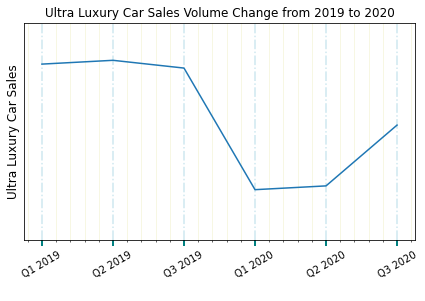

In [20]:
# Ultra Luxury car sales volume line plot

# Line chart selection
UltraLuxSales_T.plot.line(x='Quarter',y='Sales', figsize=(7,4), legend = False, rot=30, title="Ultra Luxury Car Sales Volume Change from 2019 to 2020");

# Sets the y limits
plt.ylim(20000, 32000)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Ultra Luxury Car Sales", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')
plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Ultra Luxury Car Sales Change.png')

plt.show(block=True)

# Consumer Sentiment

In [21]:
# Read the government data files
customer_df = pd.read_csv(consumer)
interest_df = pd.read_csv(interest)
UE_df = pd.read_csv(UE)

# Remove unnecessary columns from source dataframe
customer_df = customer_df.drop(['Good Time<br>Prices are Low','Good Time<br>Prices will increase',
                                'Good Time<br>Interest rates low','Good Time<br>Rising interest rates',
                                'Good Time<br>Fuel Efficiency', 'Bad Time<br>Prices High', 'Bad Time<br>Interest rates high',
                                "Bad Time<br>Can't Afford",'Bad Time<br>Gas Prices','Bad Time<br>Poor Selection','Relative: prices',
                                'Relative: rates'],axis=1)

# Remove data beyond the end of the 3Q 2020 starting at 2019-01-01
customer_df = customer_df[customer_df['Date'] >= '2019-01-01']
customer_df = customer_df[customer_df['Date'] <= '2020-10-01']

#Sort values from 2019-01-01 to 2020-10-01
customer_df = customer_df.sort_values('Date')

In [22]:
customer_df
#customer_df['Good Time<br>Times good']

,Date,Good Time<br>Times good,Bad Time<br>Uncertain Future
21,2019-01-31,12.0,6.0
20,2019-02-28,14.0,6.0
19,2019-03-31,17.0,3.0
18,2019-04-30,20.0,3.0
17,2019-05-31,16.0,4.0
16,2019-06-30,19.0,4.0
15,2019-07-31,18.0,5.0
14,2019-08-31,14.0,4.0
13,2019-09-30,18.0,5.0
12,2019-10-31,16.0,5.0


In [23]:
customer_df['Date'] = pd.to_datetime(customer_df['Date'])
customer_df

,Date,Good Time<br>Times good,Bad Time<br>Uncertain Future
21,2019-01-31,12.0,6.0
20,2019-02-28,14.0,6.0
19,2019-03-31,17.0,3.0
18,2019-04-30,20.0,3.0
17,2019-05-31,16.0,4.0
16,2019-06-30,19.0,4.0
15,2019-07-31,18.0,5.0
14,2019-08-31,14.0,4.0
13,2019-09-30,18.0,5.0
12,2019-10-31,16.0,5.0


In [24]:
# Historical points as markers
# Group by Date to create df for historical markers.
CSI = customer_df.groupby(['Date']).sum()

datesCSI = ["2020-02-29","2020-06-30"]
def find_loc(CSI, dates):
    marks = []
    for date in dates:
        marks.append(CSI.index.get_loc(date))
    return marks

### Plot Uncertain Future

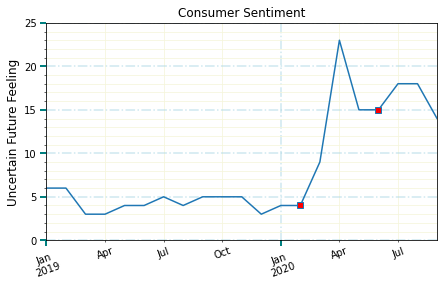

In [25]:
#Bad Time and Uncertain Future plot

# Line chart selection
customer_df.plot.line(x='Date', y='Bad Time<br>Uncertain Future', figsize=(7,4), legend = False, rot=20, title="Consumer Sentiment",
                      markevery=find_loc(CSI, datesCSI), marker='s', markerfacecolor='red')

# Sets the y limits
plt.ylim(0, 25)

# Provides labels
plt.xlabel(" ", fontsize=12)
plt.ylabel("Uncertain Future Feeling", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Consumer_Sentiment.png')

plt.show(block=True)

# Unemployment

In [26]:
UE_df

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,11/1/2000,3.9,3.4,3.4,13.0,3.5,7.3,NaN,6.0
1,12/1/2000,3.9,3.4,3.3,13.2,3.5,7.4,NaN,5.7
2,1/1/2001,4.2,3.6,3.6,13.8,3.6,8.2,NaN,5.8
3,2/1/2001,4.2,3.7,3.7,13.7,3.7,7.7,NaN,6.1
4,3/1/2001,4.3,3.8,3.6,13.8,3.7,8.3,NaN,6.2
...,...,...,...,...,...,...,...,...,...
236,7/1/2020,10.2,9.4,10.5,19.3,9.2,14.6,12.0,12.9
237,8/1/2020,8.4,8.0,8.4,16.1,7.3,13.0,10.7,10.5
238,9/1/2020,7.9,7.4,7.7,15.9,7.0,12.1,8.9,10.3
239,10/1/2020,6.9,6.7,6.5,13.9,6.0,10.8,7.6,8.8


In [27]:
# Remove unnecessary columns from source dataframe
UE_data = UE_df.drop(['Men, 20 years and over','Women, 20 years and over','16 to 19 years old','White','Black or African American','Asian','Hispanic or Latino'],axis=1)

# Rename column
UE_data = UE_data.rename(columns={'Month': 'Date','Total':'Rate (%)'})

# Remove Unemployment data beyond the end of the 3Q 2020
UE_data['Date'] = pd.to_datetime(UE_data['Date'])

UE_data = UE_data[UE_data['Date'] >= '1/1/2019']
UE_data = UE_data[UE_data['Date'] <= '10/1/2020']

# Historical points as markers

# March 27th, stimulus check
# May 27th, US reached 100.000 deaths due to COVID

# Group by Date to create df for historical markers.
UEI = UE_data.groupby(['Date']).sum()

dates = ["2020-03-01","2020-07-01"]
def find_loc(UEI, dates):
    marks = []
    for date in dates:
        marks.append(UEI.index.get_loc(date))
    return marks

In [28]:
UE_data

,Date,Rate (%)
218,2019-01-01,4.0
219,2019-02-01,3.8
220,2019-03-01,3.8
221,2019-04-01,3.6
222,2019-05-01,3.6
223,2019-06-01,3.7
224,2019-07-01,3.7
225,2019-08-01,3.7
226,2019-09-01,3.5
227,2019-10-01,3.6


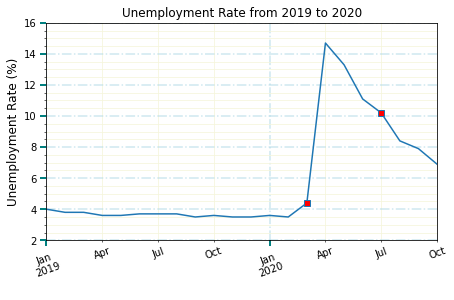

In [29]:
# Unemployment trend line
minvalue = UE_data.loc[UE_data['Rate (%)'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = UE_data.loc[UE_data['Rate (%)'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
UE_data.plot.line(x='Date', y='Rate (%)',figsize=(7,4), legend = False, rot=20, title="Unemployment Rate from 2019 to 2020",
                  markevery=find_loc(UEI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(2, 16)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Unemployment Rate (%)", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Unemployment_Rate.png')

plt.show(block=True)

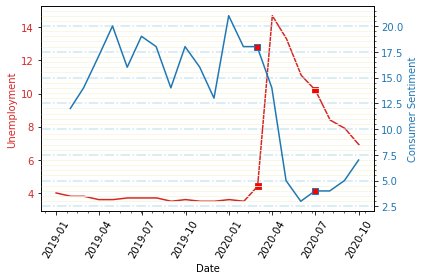

In [30]:
# Unemployment vs Consumer sentiment
# UE_data['Rate (%)']
#customer_df['Good Time<br>Times good']

#Variables for data
x_axis1 = UE_data['Date']
x_axis2 = customer_df['Date']

y_axis1 = UE_data['Rate (%)']
y_axis2 = customer_df['Good Time<br>Times good']

#Copied from https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/secondary_axis.html#sphx-glr-gallery-subplots-axes-and-figures-secondary-axis-py
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color=color)
ax1.plot(x_axis1, y_axis1, color=color,
                  markevery=find_loc(UEI, dates), marker='s', markerfacecolor='red')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=60)
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Consumer Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis2, y_axis2, color=color,
        markevery=find_loc(CSI, datesCSI), marker='s', markerfacecolor='red')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Major Grid
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/UEvsCS.png')

plt.show(block=True)

# Interest rates

In [31]:
#Convert DATE to datetime
interest_df['DATE'] = pd.to_datetime(interest_df['DATE'])

# Discard data for Q4 2020
interest_df = interest_df[interest_df['DATE'] <= '10/1/2020']

#Sort values by date 
interest_sorted = interest_df.sort_values('DATE')

# Historical points as markers
# Group by Date to create df for historical markers.
II = interest_df.groupby(['DATE']).sum()

dates = ["2020-03-02","2020-06-30"]
def find_loc(II, dates):
    marks = []
    for date in dates:
        marks.append(II.index.get_loc(date))
    return marks

#### Plot Interest rates 52 weeks

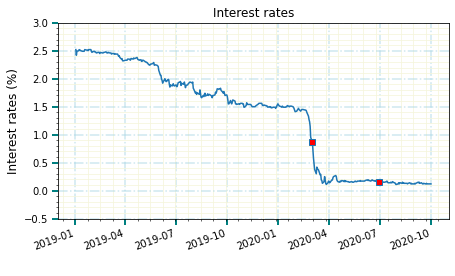

In [32]:
# 52 wk Bank Discount time series plot

# Line chart selection
interest_sorted.plot.line(x='DATE', y='52 wk BANK DISCOUNT', figsize=(7,4), legend = False, rot=20, title="Interest rates",markevery=find_loc(II, dates),marker='s', markerfacecolor='red')

# Sets the y limits
plt.ylim(-0.5, 3)

# Provides labels
plt.xlabel(" ", fontsize=12)
plt.ylabel("Interest rates (%)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Interest Rates.png')

plt.show(block=True)

# Covid


In [33]:
# Read the government data files
allState_covid = pd.read_csv(allState_path)
usCovid_covid = pd.read_csv(usCovid_path)
consumer_sentiment = pd.read_csv(conSent_path)

In [34]:
# Make a new data frame containing only two columns using df.loc[:] 
usCovid_df = usCovid_covid.loc[:,['date', 'positiveIncrease']]
#usCovid_df

In [35]:
# Sort data frame by date so that numbers of positive cases will be smaller on top
cov = usCovid_df.sort_values(by=['date'])
cov.head()

,date,positiveIncrease
324,2020-01-22,0
323,2020-01-23,0
322,2020-01-24,0
321,2020-01-25,0
320,2020-01-26,0


In [36]:
# Display CSV file for all-states-history.csv Data to Analyze - Reduce and Organize the number of Columns and Rows using: groupby, .loc(), .drop.(), and .reset_index().
#allState_covid.head()

# Display column names for clarification
allState_covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [37]:
# Pick column state and positive increase to show # of cases per day that were reported as positive
allState_covid_df = allState_covid.loc[:,['state','positiveIncrease']]
allState_covid_df

,state,positiveIncrease
0,AK,622
1,AL,3853
2,AR,2770
3,AS,0
4,AZ,6983
...,...,...
15908,WA,0
15909,MA,0
15910,WA,0
15911,MA,0


In [38]:
# Create dataframe out of grouped by state
state_df = allState_covid_df.groupby('state')

# Get the total sum of cases for the year
sum_state = state_df['positiveIncrease'].sum()

# Drop territories, keep states
state_drop = sum_state.drop(['GU','PR','VI','AS','MP'])

# Reset index
sumCases_perState = state_drop.reset_index()

# Display to check
#sumCases_perState

In [39]:
# Creating a dataframe for consumer sentiment with .loc and renaming columns
consumer_sentiment_df = consumer_sentiment.loc[:,['Date', "Good Time<br>Times good","Good Time<br>Interest rates low"]]
consumer_sentiment_df.rename(columns = {"Good Time<br>Times good":"Good Times","Good Time<br>Interest rates low":
                                       "Good Time-Interest rates low"}, inplace = True) 
# Consumer_sentiment_df

In [40]:
# State variables for date range to be analyzed
start_date = '2019-12-31'
end_date = '2020-10-31'

# Make a variable boolean to find only those rows that meet the conditions
mask = (consumer_sentiment_df['Date'] > start_date) & (consumer_sentiment_df['Date'] <= end_date)

# Creating a dataframe for just the available data for the start date to end dates data of 2020 published by UMICH
Con_Sum_df = consumer_sentiment_df.loc[mask]

# Organize dataframe
Con_Sum_df = pd.DataFrame([["2020-01-01", 18.0,18.0], ["2020-02-01", 18,19], ["2020-03-01", 14.0,22.0], ["2020-04-01",5.0,19.0],
                      ["2020-05-01", 3.0,25.0], ["2020-06-01", 4.0,28.0], ["2020-07-01", 4.0,22.0], ["2020-08-01",5.0,25.0],
                      ['2020-09-01',7.0,25.0], ['2020-10-01',7.0,24.0]], 
                   columns=["Date", "Good Times", "Good Times-Interest rates low"])

#Con_Sum_df

In [41]:
# Group by month positive cases per day
cov_month = cov.groupby(cov['date'])['positiveIncrease'].sum().sort_values()
cov_month_df= cov_month.reset_index()
cov_month_df

,date,positiveIncrease
0,2020-01-22,0
1,2020-02-12,0
2,2020-02-13,0
3,2020-02-14,0
4,2020-02-15,0
...,...,...
320,2020-12-05,212940
321,2020-12-08,215335
322,2020-12-10,215669
323,2020-12-04,224878


In [42]:
# Change Name dates to numbers - so that there could be a common column in each df and can be merged later on 
cov_month_df = pd.DataFrame([["2020-01-01", 0], ["2020-02-01", 18], ["2020-03-01", 197906], ["2020-04-01", 875821],
                      ["2020-05-01", 717464], ["2020-06-01", 832778], ["2020-07-01", 1898074], ["2020-08-01",1452932],
                      ['2020-09-01',1190447], ['2020-10-01',1883549], ['2020-11-01',4291045],
                      ["2020-12-01",2252912]], 
                   columns=["date", "positiveIncrease"])

#Renamed columns
cov_month_df = cov_month_df.rename(columns={"date":"Date","positiveIncrease":"Positive Per Month"})

cov_month_df

,Date,Positive Per Month
0,2020-01-01,0
1,2020-02-01,18
2,2020-03-01,197906
3,2020-04-01,875821
4,2020-05-01,717464
5,2020-06-01,832778
6,2020-07-01,1898074
7,2020-08-01,1452932
8,2020-09-01,1190447
9,2020-10-01,1883549


In [43]:
# Merge Clean Data sets for Consumer Sentiment and COVID positive increase per month - used .merge
# Created merged dataframe - merged with the column "Date"
casesVsentiment = pd.merge(Con_Sum_df,cov_month_df)
casesVsentiment

,Date,Good Times,Good Times-Interest rates low,Positive Per Month
0,2020-01-01,18.0,18.0,0
1,2020-02-01,18.0,19.0,18
2,2020-03-01,14.0,22.0,197906
3,2020-04-01,5.0,19.0,875821
4,2020-05-01,3.0,25.0,717464
5,2020-06-01,4.0,28.0,832778
6,2020-07-01,4.0,22.0,1898074
7,2020-08-01,5.0,25.0,1452932
8,2020-09-01,7.0,25.0,1190447
9,2020-10-01,7.0,24.0,1883549


### Plot Covid Data

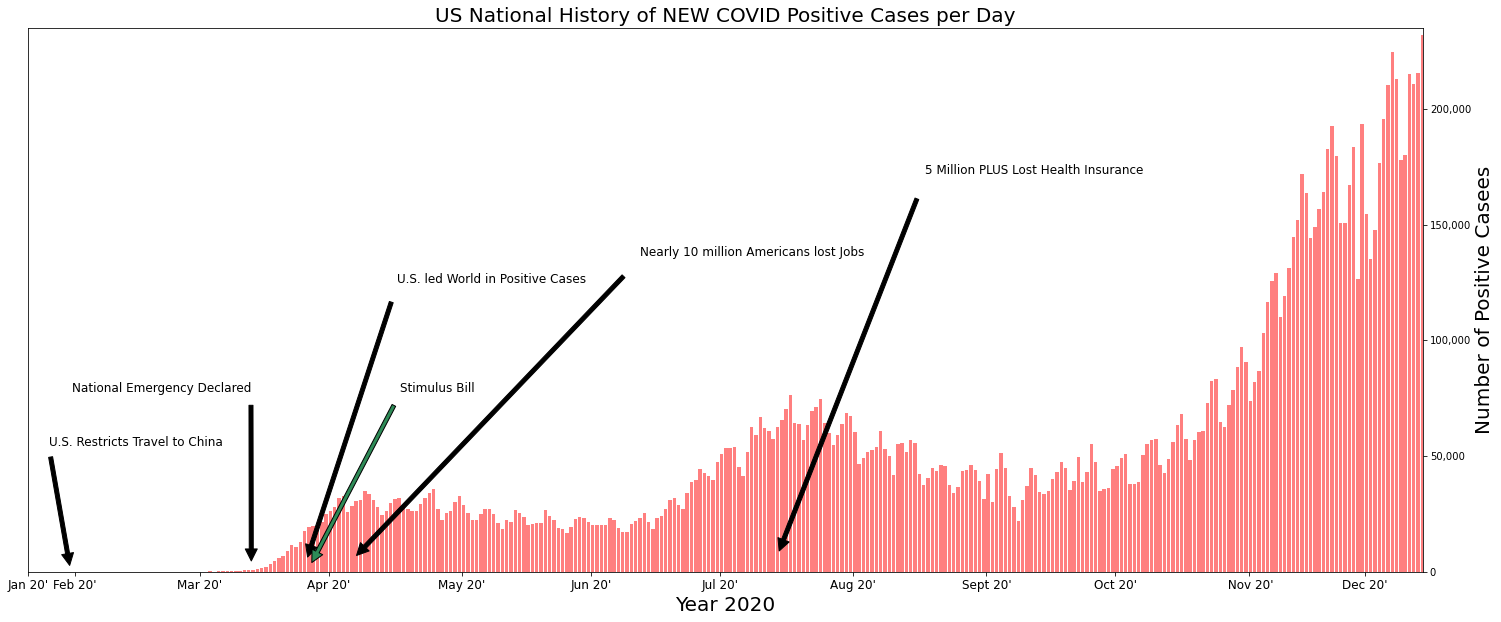

In [44]:
#Plot bar chart for daily count of new Covid cases and add 5 historical markers
# Set x axis by the length of dataframe
x_axis = np.arange(len(usCovid_df))

# determine the size of the figure
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# Plot bar plot with the length as the dates
plt.bar(x_axis, cov['positiveIncrease'], color = 'r', alpha = 0.50,align = 'edge')

# y-axis on the right side to read left to right - progressively going up in date and covid count per day
ax.yaxis.tick_right()

#plt.xticks(tick_locations)
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'","Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
# plot limits
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Labels
plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

#Historical Markers
ax.annotate('National Emergency Declared', xy=(52, 900),  xycoords='data',
            xytext=(.16, .350), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)        
ax.annotate('5 Million PLUS Lost Health Insurance', xy=(173, 500),  xycoords='data',
            xytext=(.8, .75), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Nearly 10 million Americans lost Jobs', xy=(73, 300),  xycoords='data',
            xytext=(.6, .60), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. led World in Positive Cases', xy=(64, 200),  xycoords='data',
            xytext=(.4, .55), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Stimulus Bill', xy=(65, 170),  xycoords='data',
            xytext=(.32, .35), textcoords='axes fraction',
            arrowprops=dict(facecolor='seagreen', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. Restricts Travel to China', xy=(10, 100),  xycoords='data',
            xytext=(.14, .25), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)

# Save image in directory COVID_data
plt.savefig('Images/covid_us_barplot.png')

plt.show()

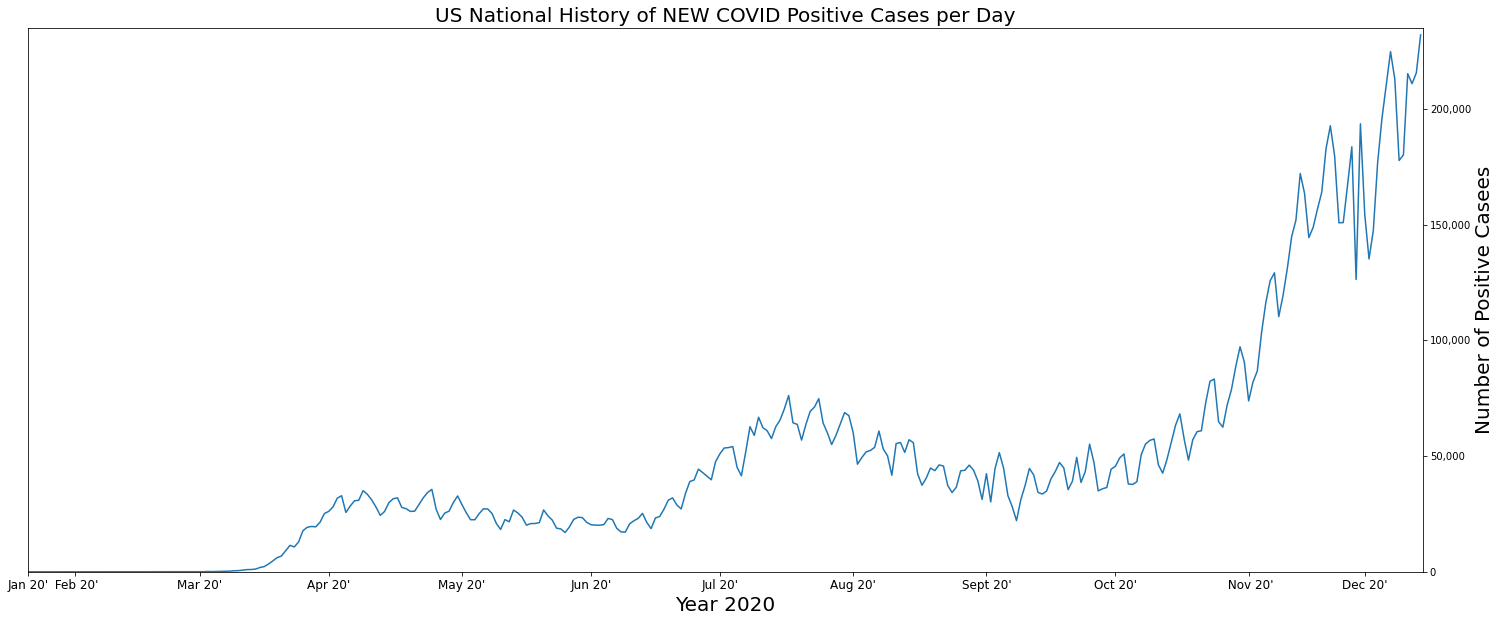

In [45]:
# Plot line chart for daily count of new Covid cases
# Create a list indicating where to write x labels and set figure size to adjust for space
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# plot by positiveIncrease column
plt.plot(x_axis, cov['positiveIncrease'])

# Set ticks(tick_locations) for x axis
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'"," Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
# y-axis on the right side
ax.yaxis.tick_right()
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

#Historical Markers
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

# Save image in directory COVID_data
plt.savefig('Images/covid_us_lineplot.png')
plt.show()

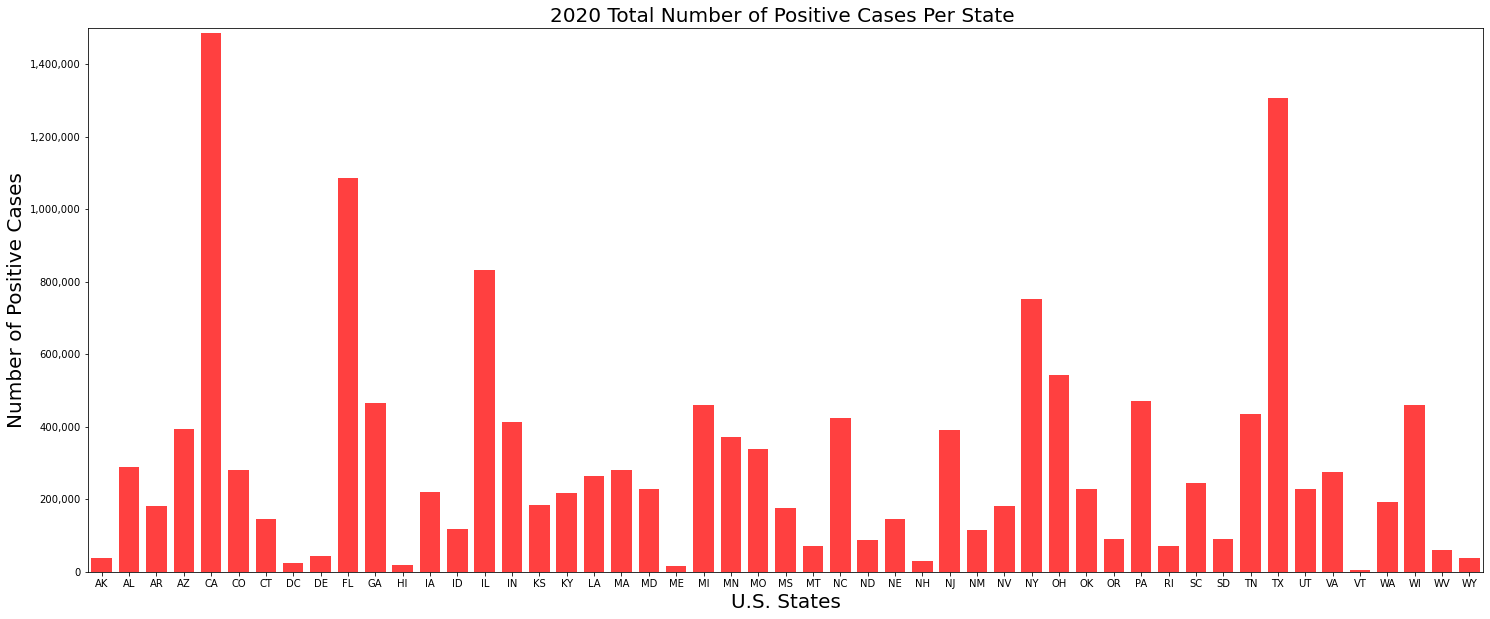

In [46]:
# Create a bar plot that shows total sum of positive covid cases per state

# fig size
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# give a variable for x and y axis using dataframe and refer to column
x_axis = sumCases_perState['state']
y_axis = sumCases_perState['positiveIncrease']

# format numbers to avoid scientific notation
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plot bar graph
plt.bar(x_axis,y_axis, align = 'center', width = .75, color = "red", alpha = 0.75)

# fit bars in graph 
plt.xlim(-0.5,len(x_axis)-.5)
plt.ylim(0, 1500000)

# Labels
plt.ylabel('Number of Positive Cases',fontsize = 20)
plt.title("2020 Total Number of Positive Cases Per State " ,fontsize = 20)
plt.xlabel('U.S. States',fontsize = 20)

# save to file
plt.savefig('Images/covid_st_barplot.png')

plt.show()

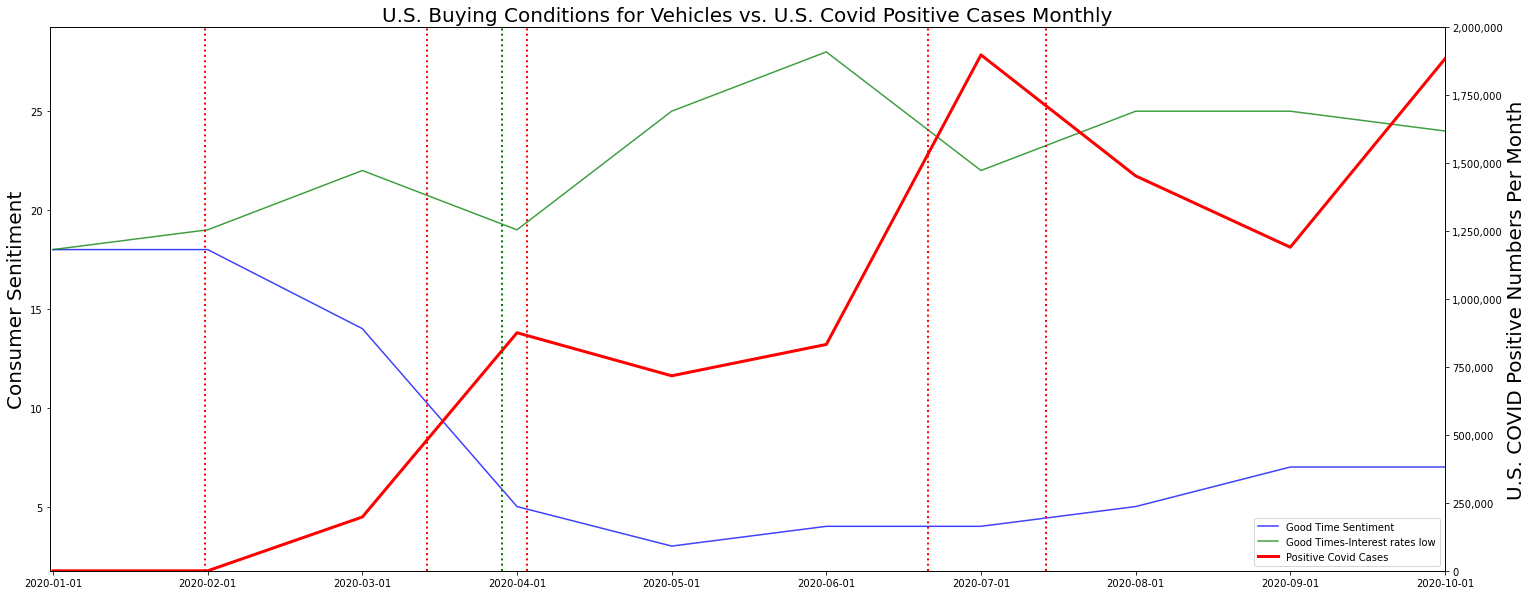

In [47]:
# Added dependency for plot - aesthetics
from matplotlib.legend_handler import HandlerLine2D

# Added variables for three line plots
x_axis = casesVsentiment['Date']
x_axis1 = casesVsentiment['Date']
x_axis2 = casesVsentiment['Date']
y_axis = casesVsentiment["Good Times"]
y_axis1 = casesVsentiment["Good Times-Interest rates low"]
y_axis2 = casesVsentiment["Positive Per Month"]

# fig size
f=plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# line plots - line plots with handles
line1, = ax.plot(x_axis,y_axis,c='blue',alpha = 0.75, label = "Good Time Sentiment")
line2, = plt.plot(x_axis1,y_axis1,c='green',alpha = 0.75, label = "Good Times-Interest rates low")

# Label y axis left for line 1 and line 2
plt.ylabel('Consumer Senitiment',fontsize = 20)

# switch line 3 y axis label to the right...it shares the same x axis as line 1 but on the right side
ax2 = ax.twinx()
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# line 3 plot
line3, = ax2.plot(x_axis2,y_axis2,c='red',lw=3, label = "Positive Covid Cases")

#label for right side 
ax2.set_ylabel('U.S. COVID Positive Numbers Per Month', fontsize = 20)

# plot legend
first_legend = plt.legend(handles=[line1,line2,line3], loc='lower right')

# Set limits for plot
plt.xlim(-.02,len(x_axis)-1)
plt.ylim(0, 2000000)

# plot title
plt.title("U.S. Buying Conditions for Vehicles vs. U.S. Covid Positive Cases Monthly" ,fontsize = 20)

# Add historical lines - x coordinates for the lines
xcoords = [.9838,2.4193, 2.9,3.066,6.4193,5.66]
# colors for the lines
colors = ['r','r','g','r','r','r']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, lw=2, ls='dotted')
    
plt.savefig('Images/buying_conditions_cars.png')
plt.show()

# Stock Data

In [48]:
# Read car sales volume data
car_sales_data = pd.read_csv(car_sales)  # Avg car brand sales price for grouping
AG_marketshare_data = pd.read_csv(autogroup_marketshare)  # Avg Auto Group marketshare for grouping

# Read the stock market data 
autostocks_data = pd.read_csv(auto_stocks)  # Auto stocks daily price data for 2019 and 2020
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020

In [49]:
# Display auto companies' stock price dataframe for preview.
autostocks_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Co
0,1/2/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
1,1/3/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
2,1/4/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
3,1/7/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
4,1/8/2019,885.599976,885.599976,885.599976,885.599976,880.801819,0,AUDVF,Audi
...,...,...,...,...,...,...,...,...,...
9277,9/25/2020,173.998004,179.443004,173.271996,179.443004,173.693159,393,VOW.F,VW
9278,9/28/2020,178.111996,178.716996,173.756007,175.328993,169.710975,283,VOW.F,VW
9279,9/29/2020,177.748993,181.741996,177.265000,181.741996,175.918484,963,VOW.F,VW
9280,9/30/2020,180.531996,181.983993,180.531996,181.741996,175.918484,318,VOW.F,VW


In [50]:
#Clean Auto Stocks Data

# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Volume','Adj Close','Open','Close'],axis=1)

# Calculate Daily Average Price from the day's High and Low price.
autostocks_data["Avg Stock Price"] = (autostocks_data["High"] + autostocks_data["Low"])/2

# Remove unnecessary columns from source dataframe
autostocks_data = autostocks_data.drop(['Low','High'],axis=1)

# Re-order Columns
autostocks_data = autostocks_data[['Date', 'Co','Ticker','Avg Stock Price']]

# Rename column- required for data merge later
autostocks_data = autostocks_data.rename(columns={'Co': 'Auto Group'})

# Remove S&P data beyond the end of the 3Q 2020
autostocks_data['Date'] = pd.to_datetime(autostocks_data['Date'])

autostocks_data = autostocks_data[autostocks_data['Date'] <= '10/1/2020']

# Checking the number of unique auto stock tickers in the clean DataFrame.
unique = autostocks_data["Auto Group"].unique()
count = len(unique)
print("No. of auto stocks:",count)

# Display auto companies' stock price dataframe for preview.
autostocks_data

No. of auto stocks: 21


,Date,Auto Group,Ticker,Avg Stock Price
0,2019-01-02,Audi,AUDVF,885.599976
1,2019-01-03,Audi,AUDVF,885.599976
2,2019-01-04,Audi,AUDVF,885.599976
3,2019-01-07,Audi,AUDVF,885.599976
4,2019-01-08,Audi,AUDVF,885.599976
...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500
9278,2020-09-28,VW,VOW.F,176.236502
9279,2020-09-29,VW,VOW.F,179.503498
9280,2020-09-30,VW,VOW.F,181.257995


In [51]:
# Drop unnecessary data columns
car_sales_data = car_sales_data.drop(['Q1 2019','Q2 2019','Q3 2019','Q4 2019','Q1 2020','Q2 2020','Q3 2020','Q4 2020'],axis=1)

# Rename column- required for data merge later
car_sales_data = car_sales_data.rename(columns={'Autogroup': 'Auto Group','Avg Price':'Avg Car Price'})

# Remove Ultra luxury brands that are part of larger auto groups to prevent significant skewing of avg car price of group
car_sales_data = car_sales_data.sort_values("Auto Group", ascending = False)
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bugatti']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Lamborghini']
car_sales_data = car_sales_data[car_sales_data['Brand'] != 'Bentley']

# Group by Auto Groups and calculate average car price sold by Auto Group
autogroup_sales_data = car_sales_data.groupby(['Auto Group']).mean().round(2)

print("No. of autogroups:", len(autogroup_sales_data))  #Check that an Auto Group hasn't been dropped during data cleaning
#autogroup_sales_data

No. of autogroups: 21


In [52]:
# Merge two dataframes together
merged_autostocks_data = autostocks_data.merge(autogroup_sales_data, on='Auto Group')

merged_autostocks_data

,Date,Auto Group,Ticker,Avg Stock Price,Avg Car Price
0,2019-01-02,Audi,AUDVF,885.599976,59017.0
1,2019-01-03,Audi,AUDVF,885.599976,59017.0
2,2019-01-04,Audi,AUDVF,885.599976,59017.0
3,2019-01-07,Audi,AUDVF,885.599976,59017.0
4,2019-01-08,Audi,AUDVF,885.599976,59017.0
...,...,...,...,...,...
9277,2020-09-25,VW,VOW.F,176.357500,30000.0
9278,2020-09-28,VW,VOW.F,176.236502,30000.0
9279,2020-09-29,VW,VOW.F,179.503498,30000.0
9280,2020-09-30,VW,VOW.F,181.257995,30000.0


In [53]:
# Merge dataframes on shared column 'Auto Group'
merged_autostocks_data = merged_autostocks_data.merge(AG_marketshare_data, on='Auto Group')

In [54]:
# Create new columns for Segment - this is prep for creating a stock index by Segment.

# Create a list of our segments
segments = [
    (merged_autostocks_data['Avg Car Price'] <= 30000),
    (merged_autostocks_data['Avg Car Price'] > 30000) & (merged_autostocks_data['Avg Car Price'] <= 45000),
    (merged_autostocks_data['Avg Car Price'] > 45000) & (merged_autostocks_data['Avg Car Price'] <= 70000),
    (merged_autostocks_data['Avg Car Price'] > 70000)
    ]

# Create a list of the values we want to assign for each segment.
values = ['Economy', 'Mid-Range', 'Luxury', 'Ultra Luxury']

# Create a new column and use np.select to assign values to it using our lists as arguments
merged_autostocks_data["Segment"] = np.select(segments, values)

# Create weighted average component of each segment by each Auto Group to create Segment Price Index
merged_autostocks_data["Stock WtAvg"] = merged_autostocks_data["Avg Stock Price"] * merged_autostocks_data["Segment Market Share"]

# Delete unnecessary columns
merged_autostocks_data = merged_autostocks_data.drop(['Avg Car Price','Segment Market Share','Auto Group','Ticker','Avg Stock Price'],axis=1)

# Display updated DataFrame
merged_autostocks_data

,Date,Segment,Stock WtAvg
0,2019-01-02,Luxury,99.187197
1,2019-01-03,Luxury,99.187197
2,2019-01-04,Luxury,99.187197
3,2019-01-07,Luxury,99.187197
4,2019-01-08,Luxury,99.187197
...,...,...,...
9277,2020-09-25,Economy,19.857855
9278,2020-09-28,Economy,19.844230
9279,2020-09-29,Economy,20.212094
9280,2020-09-30,Economy,20.409650


In [55]:
# Group by Market Segment
Economy = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Economy"), :]

MidRange = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Mid-Range"), :]

Luxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Luxury"), :]

UltraLuxury = merged_autostocks_data.loc[(merged_autostocks_data['Segment'] == "Ultra Luxury"), :]

In [56]:
# Group by Date to create index by segment stock price
EconI = Economy.groupby(['Date']).sum()
EconIndex = EconI.reset_index()

MidRngIndex = MidRange.groupby(['Date']).sum()
MidRngIndex = MidRngIndex.reset_index()

LuxIndex = Luxury.groupby(['Date']).sum()
LuxIndex = LuxIndex.reset_index()

UltraLuxIndex = UltraLuxury.groupby(['Date']).sum()
UltraLuxIndex = UltraLuxIndex.reset_index()

# Plot Stock Data

In [57]:
# Historical points as markers
dates = ["2020-03-27","2020-05-27"]
def find_loc(EconI, dates):
    marks = []
    for date in dates:
        marks.append(EconI.index.get_loc(date))
    return marks

In [58]:
# S&P 500 Stock Market data
# S&P Working notebook also included in project file

# Calculate Daily Average Price from the day's High and Low price.
SP_data["Avg Price"] = (SP_data["High"] + SP_data["Low"])/2

# Remove S&P data beyond the end of the 3Q 2020
SP_data['Date'] = pd.to_datetime(SP_data['Date'])

SP_data = SP_data[SP_data['Date'] <= '10/1/2020']

# Remove unnecessary columns from source dataframe
SP_data = SP_data.drop(['Volume','Adj Close','Open','Close','Low','High'],axis=1)

# Display S&P 500 stock price dataframe
#SP_data

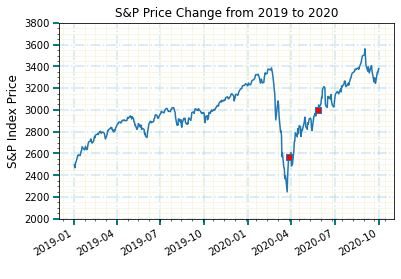

In [59]:
#S&P time series line plot
minvalue = SP_data.loc[SP_data['Avg Price'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = SP_data.loc[SP_data['Avg Price'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
SP_data.plot.line(x='Date', y='Avg Price', legend = False, rot=30, title="S&P Price Change from 2019 to 2020",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(2000, 3800)

# Provides labels
plt.xlabel(" ")
plt.ylabel("S&P Index Price", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/S&P Price Change.png')

plt.show(block=True)

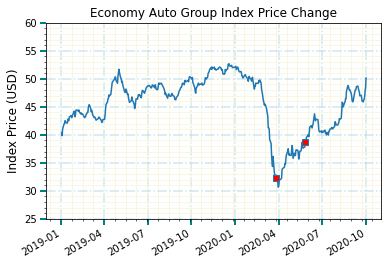

In [60]:
# Economy Auto Group Index Stock Price Change
minvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = EconIndex.loc[EconIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
EconIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=30, title="Economy Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(25, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Economy AG Index Stock Price Change.png')

plt.show(block=True)

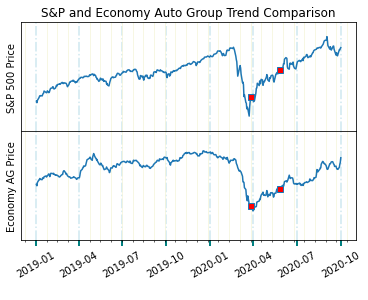

In [61]:
# S&P and Economy AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Economy Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(EconIndex['Date'], EconIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Economy Auto Group Index'])
axs[1].set_ylabel("Economy AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(20,60)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Economy Auto Group Trend Comparison.png')

plt.show()

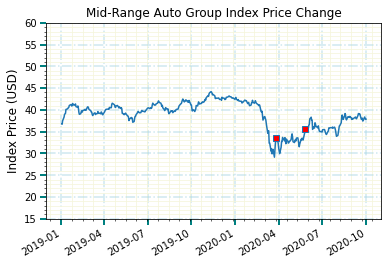

In [62]:
# Mid-Range Auto Group Index Stock Price Change
minvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = MidRngIndex.loc[MidRngIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
MidRngIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=30, title="Mid-Range Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(15, 60)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/MidRange AG Index Stock Price Change.png')

plt.show(block=True)

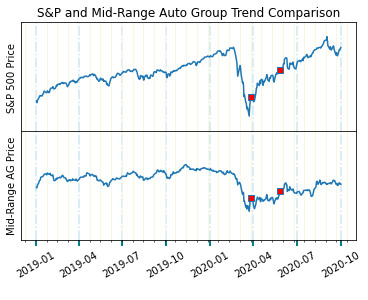

In [63]:
# S&P and Mid-Range AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Mid-Range Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(MidRngIndex['Date'], MidRngIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Mid-Range Auto Group Index'])
axs[1].set_ylabel("Mid-Range AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(20,55)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Mid-Range Auto Group Trend Comparison.png')

plt.show()

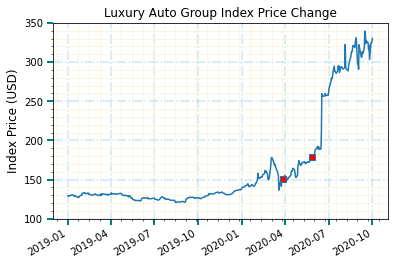

In [64]:
# Luxury Auto Group Index Stock Price Change
minvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = LuxIndex.loc[LuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
LuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=30, title="Luxury Auto Group Index Price Change",markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(100, 350)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Luxury AG Index Stock Price Change.png')

plt.show(block=True)

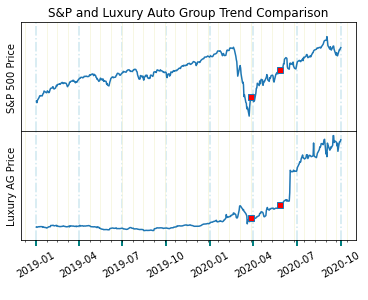

In [65]:
# S&P and Luxury AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Luxury Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(LuxIndex['Date'], LuxIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Luxury Auto Group Index'])
axs[1].set_ylabel("Luxury AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(100, 350)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Luxury Auto Group Trend Comparison.png')

plt.show()

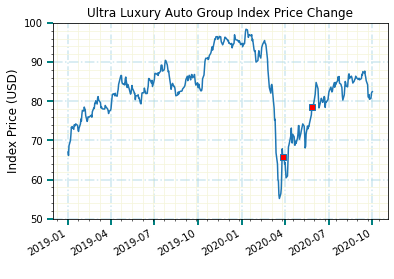

In [66]:
# Ultra Luxury Auto Group Index Stock Price Change
minvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = UltraLuxIndex.loc[UltraLuxIndex['Stock WtAvg'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
UltraLuxIndex.plot.line(x='Date', y='Stock WtAvg', legend = False, rot=30, title="Ultra Luxury Auto Group Index Price Change", markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(50, 100)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Index Price (USD)",fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Turn off tick labels
#plt.yticks([])

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/UltraLuxury AG Index Stock Price Change.png', colors='darkblue')

plt.show(block=True)

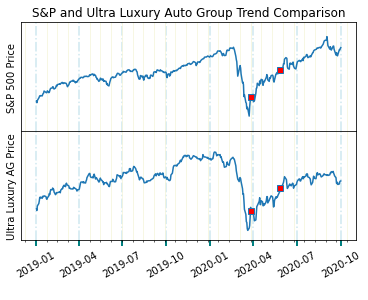

In [67]:
# S&P and Ultra Luxury AG Combination Plot

fig, axs = plt.subplots(2, 1, sharex=True)

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Provides labels
plt.xlabel(" ")

# Plot tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Plot each graph, and manually set the y tick values
axs[0].plot(SP_data['Date'], SP_data['Avg Price'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[0].set_yticklabels(['S&P 500'])
axs[0].set_ylabel("S&P 500 Price", fontsize=10)
axs[0].set_yticks([])
axs[0].set_ylim(2000, 3800)
axs[0].title.set_text('S&P and Ultra Luxury Auto Group Trend Comparison')
axs[0].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[0].minorticks_on()  # Minor grid lines
axs[0].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)   # Minor grid lines

axs[1].plot(UltraLuxIndex['Date'], UltraLuxIndex['Stock WtAvg'],markevery=find_loc(EconI, dates), marker='s', markerfacecolor='red');
axs[1].set_yticklabels(['Ultra Luxury Auto Group Index'])
axs[1].set_ylabel("Ultra Luxury AG Price", fontsize=10)
axs[1].set_yticks([])
axs[1].set_ylim(50, 110)
axs[1].grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)  # Major grid lines
axs[1].minorticks_on()  # Minor grid lines
axs[1].grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)  # Minor grid lines
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

# Save the figure as .png
plt.savefig('Images/S&P and Ultra Luxury Auto Group Trend Comparison.png')

plt.show()